In [1]:
import math
import matplotlib.pyplot as plt
import Library.end_end as e

# 6. Find the dominant eigen value and eigen vector of the matrix

In [2]:
# given matrix
A = [[1, -2, 0, 5], [0, 7, 1, 5], [0,4, 4, 0],[0,0,0,2]]
# guess vector
x_o = [[1],[1],[1],[1]]
# calling the function
print("The normalised eigen vector and the eigen value is ", e.powr_iter(A,x_o,0.001))

The normalised eigen vector and the eigen value is  ([[-0.19841693828127313], [0.6940687096178141], [0.6920255373085772], [2.5403210838495812e-05]], 7.9954229472778735)


# 3. Solve F(x) = 2.5 - x*exp(x) by Newton's method

In [3]:
# define the function 
def f(x):
    return 2.5-x*math.exp(x)
# calling the function
k = e.newton_raphson(f, lambda x: -math.exp(x)-x*math.exp(x), 0.5)
print("The spring could stretch upto the distance ",k ,"m")

The spring could stretch upto the distance  0.9585863567288397 m


# 4. Solve the given integral by simpson's rule 

In [4]:
# define the time period function
def time_period(x):
    return 1/math.sqrt(1-math.sin(math.pi/8)**2*math.sin(x)**2)
# calling the function
m = e.simpson(time_period,0,math.pi/2,10,0)
n = 4*math.sqrt(1/9.8)*m
# print(m)
print("The time period of the pendulum is ",n ,"s")

The time period of the pendulum is  2.0873200168941946 s


# 7. Fit the given dataset 

In [5]:
# read the data from the file assign4fit.txt 
filename = "esem4fit.txt"
with open(filename) as f:
    x, y = [], []
    points = f.readlines()
    for point in points:
        xs, ys = point.split()
        x.append(float(xs))
        y.append(float(ys))

x1 = x
y1 = y
# print the data set 
# print(x1)
# print(y1)

The co-efficient of the polynomial is [0.254629507211548, -1.1937592138092277, -0.45725541238296813, -0.8025653910658186, 0.013239427477396298]
The polynomial is 0.254629507211548 + -1.1937592138092277 x -0.45725541238296813 x^2 + -0.8025653910658186 x^3 + 0.013239427477396298 x^4


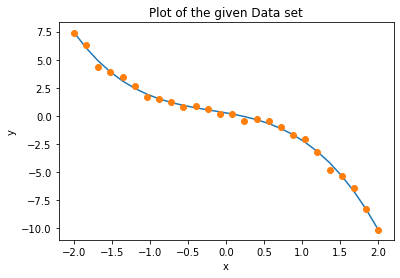

In [6]:
# calling the function from the library for least square fit
print("The co-efficient of the polynomial is", e.least_square_method(x1,y1,4))
k = e.least_square_method(x1,y1, 4)
print("The polynomial is", k[0],"+",k[1],"x",k[2],"x^2 +",k[3],"x^3 +" , k[4],"x^4")
# function for plotting the graph    
def plot(x):
    y = []
    n = len(x)
    m = 0
    for i in range(n):
        m = [k[0]+k[1]*x[i]+k[2]*x[i]**2+k[3]*x[i]**3+k[4]*x[i]**4]
        y.append(m)
    return y
plt.title("Plot of the given Data set")
plt.plot(x1,plot(x1))
plt.plot(x1,y1,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 5. Solve the differential equation by Rk- 4

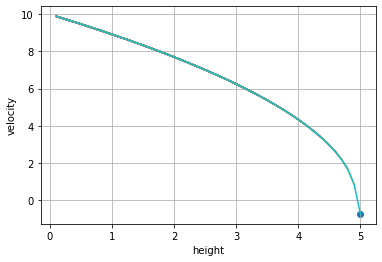

In [7]:
# define the function 
def f(y,v):
    return -0.02-10/v
# calling the function 
height,v = e.range_kutta_fourth(f,0,10,0.1,50)
# ploting the graph
plt.scatter(height,v)
plt.plot(height,v)
plt.xlabel('height')
plt.ylabel('velocity')
plt.grid()
plt.show()


# 

# 1. Calculate inverse using the LU decomposition 

In [8]:
# given matrix 
A = [[0.2, -5, 3, 0.4, 0],
     [-0.5, 1, 7,-2,0.3], 
     [0.6, 2, -4, 3, 0.1],
     [3, 0.8, 2, -0.4, 3], 
     [0.5, 3, 2, 0.4, 1]]
print("The inverse of the matrix exists: ",e.check_inverse(A))
print("The inverse of the matrix is: \n",e.matrix_inverse(A))

The inverse of the matrix exists:  True
The inverse of the matrix is: 
 [[-0.708, 2.531, 2.431, 0.967, -3.902], [-0.193, 0.31, 0.279, 0.058, -0.294], [0.022, 0.365, 0.286, 0.051, -0.29], [0.273, -0.13, 0.132, -0.141, 0.449], [0.782, -2.875, -2.679, -0.701, 4.234]]


# 2. Equilibrium problem 

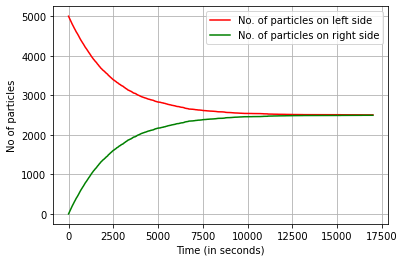

In [9]:
# given condition 
N0 = 5000
nl = 5000
nr = 0
Nl = [5000]
Nr = [0]
# creating the random number in the range of 0 to 1
rand = e.My_random(3,17000,0)
# main loop for equilrium 
for t in range(17000):
    if rand[t] <= nl/N0:
        nl -= 1
        nr += 1    
    if rand[t] <= 1-nl/N0:
        nl += 1
        nr -= 1
    Nl.append(nl)
    Nr.append(nr)
# ploting the graph   
plt.plot(Nl,color='r',label='No. of particles on left side')
plt.plot(Nr,color='g',label='No. of particles on right side')
plt.ylabel('No of particles')
plt.xlabel('Time (in seconds)')
plt.legend()
plt.grid()
plt.show()